<a href="https://colab.research.google.com/github/mouni-04/infosys_nutrition/blob/main/Nutrition_diet_Recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/nutridiet_dataset.csv'  # Replace with your file path or uploaded file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
df.head()


,User_ID,Height_cm,Weight_kg,Age,Gender,Health_Condition,Recommended_Breakfast,Recommended_Lunch,Recommended_Dinner,Nutrient_1,...,Nutrient_491,Nutrient_492,Nutrient_493,Nutrient_494,Nutrient_495,Nutrient_496,Nutrient_497,Nutrient_498,Nutrient_499,Nutrient_500
0,1,154,118,23,Female,Diabetes,Poha,Rajma-Chawal,Dal-Roti,31.291252,...,29.066116,10.493428,82.307603,32.860807,43.398620,19.799666,16.372094,62.907319,17.919133,17.067221
1,2,194,89,49,Female,Diabetes,Poha,Rajma-Chawal,Salad,43.707442,...,91.574378,64.023236,15.886916,47.273242,74.150651,58.040506,24.847250,69.021601,26.915741,74.101202
2,3,170,43,42,Male,Diabetes,Upma,Rajma-Chawal,Paneer Tikka,66.057085,...,67.941048,84.662747,1.459605,96.503970,88.352189,90.951659,11.725574,10.787391,18.160213,97.032056
3,4,185,59,44,Male,Heart Disease,Idli,Biryani,Dal-Roti,61.974701,...,10.060533,45.872558,53.911172,82.985536,68.776901,7.568175,4.175476,53.415840,68.902009,32.631501
4,5,172,71,62,Male,Hypertension,Upma,Khichdi,Paneer Tikka,48.010552,...,32.052140,50.052580,23.526154,34.312644,27.082005,80.047623,1.376058,91.099775,40.659460,73.087726


In [ ]:
# Check for missing values
print(df.isnull().sum())


User_ID         0
Height_cm       0
Weight_kg       0
Age             0
Gender          0
               ..
Nutrient_496    0
Nutrient_497    0
Nutrient_498    0
Nutrient_499    0
Nutrient_500    0
Length: 509, dtype: int64


In [ ]:
df = df.dropna()


In [ ]:
# Checking for any outliers in height, weight, and age
import seaborn as sns
import matplotlib.pyplot as plt

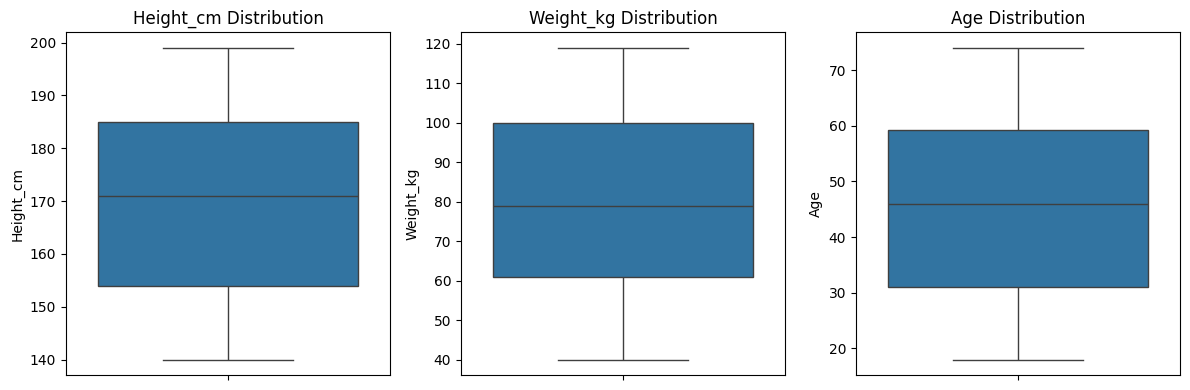

In [ ]:
# Plot distributions to visualize outliers
plt.figure(figsize=(12, 4))
for i, column in enumerate(['Height_cm', 'Weight_kg', 'Age'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[column])
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

In [ ]:
 # Step 1.3: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Health_Condition', 'Recommended_Breakfast',
                                         'Recommended_Lunch', 'Recommended_Dinner'], drop_first=True)

In [ ]:
# Display the first few rows of the one-hot encoded dataset
df_encoded.head()
from sklearn.model_selection import train_test_split

In [ ]:
# Drop the User_ID column as it’s not needed for model training
df_encoded = df_encoded.drop(['User_ID'], axis=1)


In [ ]:
# Separating features (X) and target variable (y)
# Here, the target could be one of the recommendations, e.g., 'Recommended_Breakfast_Poha'
X = df_encoded.drop(['Recommended_Breakfast_Poha'], axis=1)  # Example target: Poha for breakfast
y = df_encoded['Recommended_Breakfast_Poha']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Training set shape: (800, 519)
Testing set shape: (200, 519)


In [ ]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

       False       0.79      1.00      0.88       157
        True       0.00      0.00      0.00        43

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
 # Initialize the Random Forest Classifier with balanced class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Balanced Class Weights:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from imblearn.over_sampling import SMOTE

Model Accuracy with Balanced Class Weights: 0.785

Classification Report:
               precision    recall  f1-score   support

       False       0.79      1.00      0.88       157
        True       0.00      0.00      0.00        43

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Train the model on the resampled training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with SMOTE:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.ensemble import GradientBoostingClassifier

Model Accuracy with SMOTE: 0.79

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.99      0.88       157
        True       0.67      0.05      0.09        43

    accuracy                           0.79       200
   macro avg       0.73      0.52      0.48       200
weighted avg       0.76      0.79      0.71       200



In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = gb_model.predict(X_test)

In [ ]:
# Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Gradient Boosting:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

Model Accuracy with Gradient Boosting: 0.77

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.76      0.84       157
        True       0.48      0.79      0.60        43

    accuracy                           0.77       200
   macro avg       0.70      0.78      0.72       200
weighted avg       0.83      0.77      0.79       200



In [ ]:
# Use a subset of your training data for tuning
from sklearn.model_selection import RandomizedSearchCV
X_train_subset = X_train_resampled.sample(frac=0.1, random_state=42)  # Use 10% of the data
y_train_subset = y_train_resampled.loc[X_train_subset.index]
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_grid_gb, scoring='f1_weighted',
                                      cv=2, n_iter=2, n_jobs=-1, random_state=42, verbose=2)
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_grid_gb, scoring='f1_weighted',
                                      cv=2, n_iter=4, n_jobs=-1, random_state=42, verbose=2)
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_grid_gb, scoring='f1_weighted',
                                      cv=3, n_iter=4, n_jobs=-1, random_state=42, verbose=1)
  # Fit the RandomizedSearchCV
random_search_gb.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [ ]:
# Train the best estimator
best_gb = random_search_gb.best_estimator_
best_gb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = best_gb.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Tuned Gradient Boosting Parameters:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Model Accuracy with Tuned Gradient Boosting Parameters: 0.77

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.76      0.84       157
        True       0.48      0.79      0.60        43

    accuracy                           0.77       200
   macro avg       0.70      0.78      0.72       200
weighted avg       0.83      0.77      0.79       200



In [ ]:
# Sample Data (replace with your actual data)
data = {
    'Height_cm': [150, 160, 170, 180, 190],
    'Weight_kg': [50, 60, 70, 80, 90],
    'Health Condition': ['Normal', 'Overweight', 'Normal', 'Obese', 'Underweight']
}

df = pd.DataFrame(data)

In [ ]:
# Check the column names
print(df.columns)  # Ensure 'Height_cm', 'Weight_kg', and 'Health Condition' are correct

Index(['Height_cm', 'Weight_kg', 'Health Condition'], dtype='object')


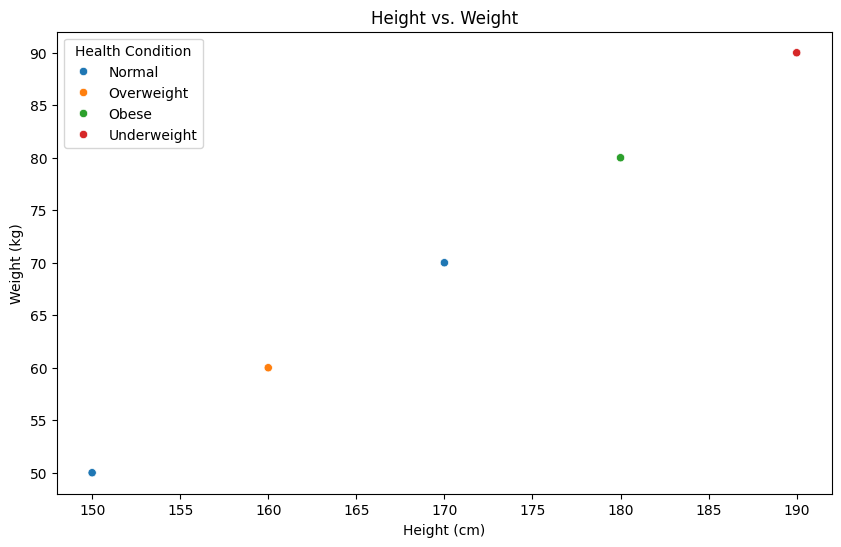

In [ ]:
# Scatter Plot Example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height_cm', y='Weight_kg', hue='Health Condition', data=df)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Health Condition')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

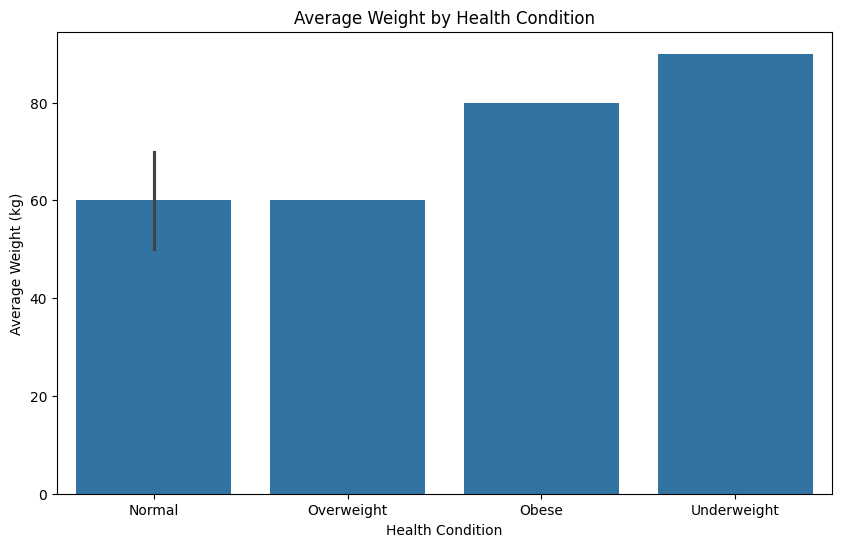

In [ ]:

# Assuming df is your DataFrame and y_test, y_pred, and y_pred_proba are defined

# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Health Condition', y='Weight_kg', data=df, estimator=np.mean)
plt.title('Average Weight by Health Condition')
plt.xlabel('Health Condition')
plt.ylabel('Average Weight (kg)')
plt.show()

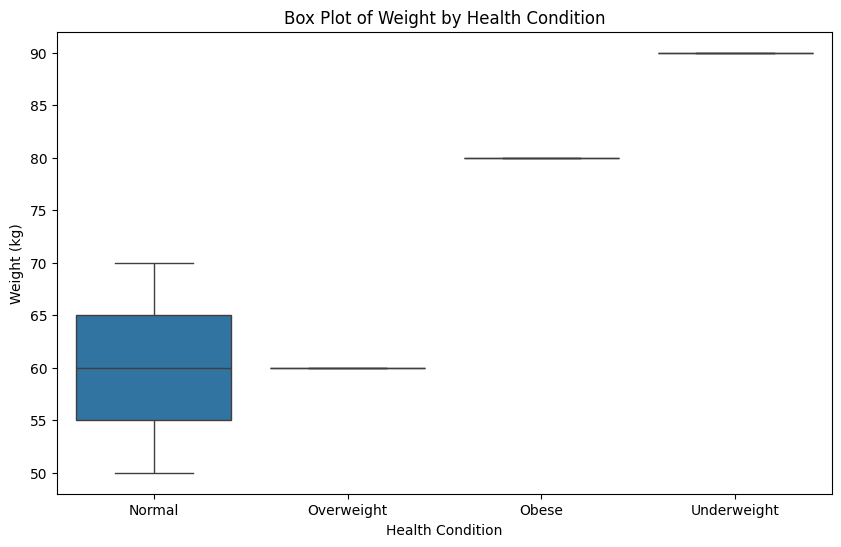

In [ ]:
# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health Condition', y='Weight_kg', data=df)
plt.title('Box Plot of Weight by Health Condition')
plt.xlabel('Health Condition')
plt.ylabel('Weight (kg)')
plt.show()

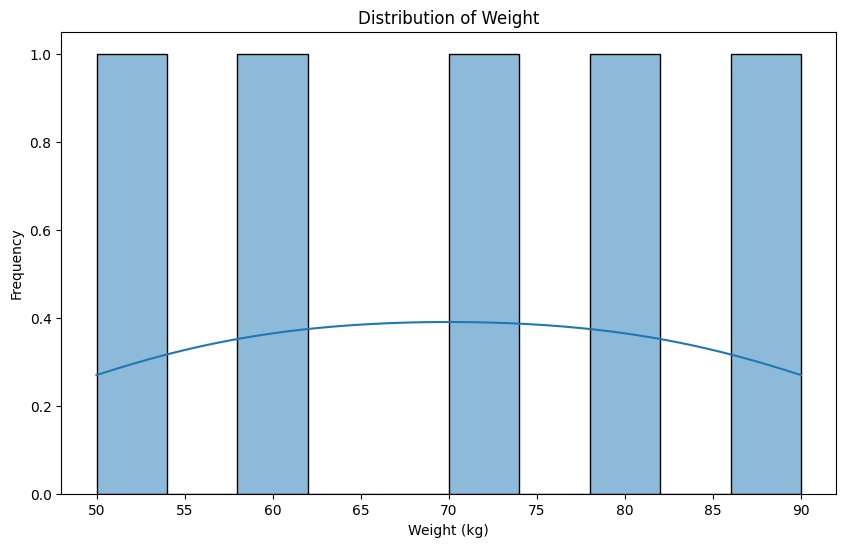

In [ ]:
# 3. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight_kg'], bins=10, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

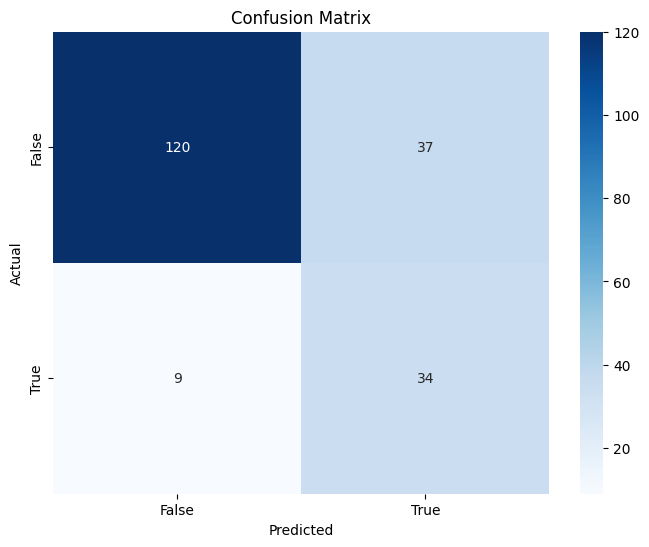

In [ ]:
# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

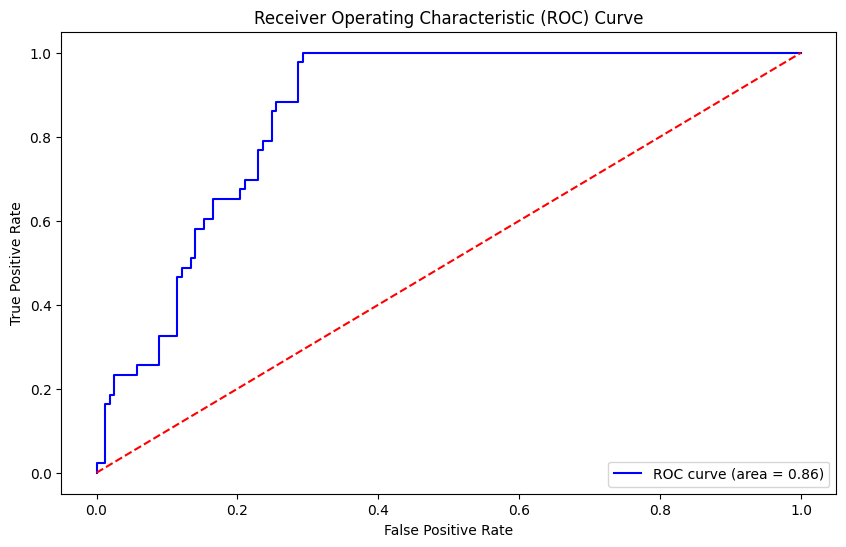

In [ ]:
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Save the trained model
joblib.dump(best_gb, 'nutrient_recommendation_model.pkl')
print("Column names as list:", X_train.columns.tolist())
print("Column names:", X_train.columns)

# Sample data with modified column names (replace this with actual data)
data = {
    'Gender': ['Male', 'Female', 'Female'],              # Modified from 'Gender' to 'Sex'
    'Medical_Condition': ['Healthy', 'Diabetes', 'Obesity']  # Modified from 'Health_Condition' to 'Medical_Condition'
}
df = pd.DataFrame(data)

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False for dense output
encoder.fit(df[['Gender', 'Medical_Condition']])  # Update the column names here

# Retrieve and display encoded feature names
feature_names = encoder.get_feature_names_out(['Gender', 'Medical_Condition'])  # Update the feature names
print("Encoded feature names:", feature_names)


Column names as list: ['Height_cm', 'Weight_kg', 'Age', 'Nutrient_1', 'Nutrient_2', 'Nutrient_3', 'Nutrient_4', 'Nutrient_5', 'Nutrient_6', 'Nutrient_7', 'Nutrient_8', 'Nutrient_9', 'Nutrient_10', 'Nutrient_11', 'Nutrient_12', 'Nutrient_13', 'Nutrient_14', 'Nutrient_15', 'Nutrient_16', 'Nutrient_17', 'Nutrient_18', 'Nutrient_19', 'Nutrient_20', 'Nutrient_21', 'Nutrient_22', 'Nutrient_23', 'Nutrient_24', 'Nutrient_25', 'Nutrient_26', 'Nutrient_27', 'Nutrient_28', 'Nutrient_29', 'Nutrient_30', 'Nutrient_31', 'Nutrient_32', 'Nutrient_33', 'Nutrient_34', 'Nutrient_35', 'Nutrient_36', 'Nutrient_37', 'Nutrient_38', 'Nutrient_39', 'Nutrient_40', 'Nutrient_41', 'Nutrient_42', 'Nutrient_43', 'Nutrient_44', 'Nutrient_45', 'Nutrient_46', 'Nutrient_47', 'Nutrient_48', 'Nutrient_49', 'Nutrient_50', 'Nutrient_51', 'Nutrient_52', 'Nutrient_53', 'Nutrient_54', 'Nutrient_55', 'Nutrient_56', 'Nutrient_57', 'Nutrient_58', 'Nutrient_59', 'Nutrient_60', 'Nutrient_61', 'Nutrient_62', 'Nutrient_63', 'Nutrien

In [ ]:
import pandas as pd

# Example original dataset with modified variable names
data_example = {
    'Gender': ['Male', 'Female', 'Female'],
    'Health_Status': ['Healthy', 'Diabetes', 'Obesity']  # Changed 'Health_Condition' to 'Health_Status'
}

# Create DataFrame from the modified dataset
df_modified = pd.DataFrame(data_example)

# Check the DataFrame
print(df_modified)


   Gender Health_Status
0    Male       Healthy
1  Female      Diabetes
2  Female       Obesity


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data_example = {
    'Gender': ['Male', 'Female', 'Female'],
    'Health_Condition': ['Healthy', 'Diabetes', 'Obesity']
}

In [ ]:
df = pd.DataFrame(data)

# Define and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoder.fit(df_modified[['Gender', 'Health_Condition']])  # Use modified feature columns


OneHotEncoder(sparse_output=False)

In [ ]:
# Get feature names
feature_names = encoder.get_feature_names_out()
print(feature_names)  # Print feature names to check the encoding

['Gender_Female' 'Gender_Male' 'Health_Condition_Diabetes'
 'Health_Condition_Healthy' 'Health_Condition_Obesity']


In [ ]:
# Assuming `encoder` is your fitted OneHotEncoder
feature_names = encoder.get_feature_names_out()

In [ ]:
# If using OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[['Gender', 'Medical_Condition']])  # Fit on your actual data
feature_names = encoder.get_feature_names_out()
print("Model feature names:", model.feature_names_in_)

Model feature names: ['Height_cm' 'Weight_kg' 'Age' 'Nutrient_1' 'Nutrient_2' 'Nutrient_3'
 'Nutrient_4' 'Nutrient_5' 'Nutrient_6' 'Nutrient_7' 'Nutrient_8'
 'Nutrient_9' 'Nutrient_10' 'Nutrient_11' 'Nutrient_12' 'Nutrient_13'
 'Nutrient_14' 'Nutrient_15' 'Nutrient_16' 'Nutrient_17' 'Nutrient_18'
 'Nutrient_19' 'Nutrient_20' 'Nutrient_21' 'Nutrient_22' 'Nutrient_23'
 'Nutrient_24' 'Nutrient_25' 'Nutrient_26' 'Nutrient_27' 'Nutrient_28'
 'Nutrient_29' 'Nutrient_30' 'Nutrient_31' 'Nutrient_32' 'Nutrient_33'
 'Nutrient_34' 'Nutrient_35' 'Nutrient_36' 'Nutrient_37' 'Nutrient_38'
 'Nutrient_39' 'Nutrient_40' 'Nutrient_41' 'Nutrient_42' 'Nutrient_43'
 'Nutrient_44' 'Nutrient_45' 'Nutrient_46' 'Nutrient_47' 'Nutrient_48'
 'Nutrient_49' 'Nutrient_50' 'Nutrient_51' 'Nutrient_52' 'Nutrient_53'
 'Nutrient_54' 'Nutrient_55' 'Nutrient_56' 'Nutrient_57' 'Nutrient_58'
 'Nutrient_59' 'Nutrient_60' 'Nutrient_61' 'Nutrient_62' 'Nutrient_63'
 'Nutrient_64' 'Nutrient_65' 'Nutrient_66' 'Nutrient_67' 'Nutri

In [ ]:
print("Columns in df:", df.columns.tolist())


Columns in df: ['Gender', 'Medical_Condition']


In [ ]:
print("Model expected feature names:", model.feature_names_in_)


Model expected feature names: ['Height_cm' 'Weight_kg' 'Age' 'Nutrient_1' 'Nutrient_2' 'Nutrient_3'
 'Nutrient_4' 'Nutrient_5' 'Nutrient_6' 'Nutrient_7' 'Nutrient_8'
 'Nutrient_9' 'Nutrient_10' 'Nutrient_11' 'Nutrient_12' 'Nutrient_13'
 'Nutrient_14' 'Nutrient_15' 'Nutrient_16' 'Nutrient_17' 'Nutrient_18'
 'Nutrient_19' 'Nutrient_20' 'Nutrient_21' 'Nutrient_22' 'Nutrient_23'
 'Nutrient_24' 'Nutrient_25' 'Nutrient_26' 'Nutrient_27' 'Nutrient_28'
 'Nutrient_29' 'Nutrient_30' 'Nutrient_31' 'Nutrient_32' 'Nutrient_33'
 'Nutrient_34' 'Nutrient_35' 'Nutrient_36' 'Nutrient_37' 'Nutrient_38'
 'Nutrient_39' 'Nutrient_40' 'Nutrient_41' 'Nutrient_42' 'Nutrient_43'
 'Nutrient_44' 'Nutrient_45' 'Nutrient_46' 'Nutrient_47' 'Nutrient_48'
 'Nutrient_49' 'Nutrient_50' 'Nutrient_51' 'Nutrient_52' 'Nutrient_53'
 'Nutrient_54' 'Nutrient_55' 'Nutrient_56' 'Nutrient_57' 'Nutrient_58'
 'Nutrient_59' 'Nutrient_60' 'Nutrient_61' 'Nutrient_62' 'Nutrient_63'
 'Nutrient_64' 'Nutrient_65' 'Nutrient_66' 'Nutrient_6

In [ ]:
# Create a dictionary with all expected feature names set to default values
expected_features = {feature: 0 for feature in model.feature_names_in_}

# Update this dictionary with actual values for relevant features
expected_features.update({
    'Age': 30,
    'Height_cm': 170,
    'Weight_kg': 75,
    'Gender_Male': 1,
    'Health_Condition_Healthy': 1,
    # Add your actual values for specific nutrients, e.g., Nutrient_1: 15, Nutrient_2: 10, etc.
    'Nutrient_1': 15,
    'Nutrient_2': 20,
    # Continue updating for all relevant nutrients
})

# Convert the dictionary to a DataFrame
new_input_df = pd.DataFrame([expected_features])

# Check if it matches the expected structure
print("Final input structure:", new_input_df.columns.tolist())


Final input structure: ['Height_cm', 'Weight_kg', 'Age', 'Nutrient_1', 'Nutrient_2', 'Nutrient_3', 'Nutrient_4', 'Nutrient_5', 'Nutrient_6', 'Nutrient_7', 'Nutrient_8', 'Nutrient_9', 'Nutrient_10', 'Nutrient_11', 'Nutrient_12', 'Nutrient_13', 'Nutrient_14', 'Nutrient_15', 'Nutrient_16', 'Nutrient_17', 'Nutrient_18', 'Nutrient_19', 'Nutrient_20', 'Nutrient_21', 'Nutrient_22', 'Nutrient_23', 'Nutrient_24', 'Nutrient_25', 'Nutrient_26', 'Nutrient_27', 'Nutrient_28', 'Nutrient_29', 'Nutrient_30', 'Nutrient_31', 'Nutrient_32', 'Nutrient_33', 'Nutrient_34', 'Nutrient_35', 'Nutrient_36', 'Nutrient_37', 'Nutrient_38', 'Nutrient_39', 'Nutrient_40', 'Nutrient_41', 'Nutrient_42', 'Nutrient_43', 'Nutrient_44', 'Nutrient_45', 'Nutrient_46', 'Nutrient_47', 'Nutrient_48', 'Nutrient_49', 'Nutrient_50', 'Nutrient_51', 'Nutrient_52', 'Nutrient_53', 'Nutrient_54', 'Nutrient_55', 'Nutrient_56', 'Nutrient_57', 'Nutrient_58', 'Nutrient_59', 'Nutrient_60', 'Nutrient_61', 'Nutrient_62', 'Nutrient_63', 'Nutrie

In [ ]:
predictions = model.predict(new_input_df)
print("Predictions:", predictions)

if hasattr(model, "predict_proba"):
    probabilities = model.predict_proba(new_input_df)
    print("Probabilities:", probabilities)


Predictions: [ True]
Probabilities: [[0.48 0.52]]


In [ ]:
if hasattr(model, "feature_importances_"):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": model.feature_names_in_,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)
    print(feature_importance_df.head(10))  # Show top 10 important features


                           Feature  Importance
508     Recommended_Breakfast_Idli    0.050450
509  Recommended_Breakfast_Paratha    0.047276
510     Recommended_Breakfast_Upma    0.045499
45                     Nutrient_43    0.011386
436                   Nutrient_434    0.008969
388                   Nutrient_386    0.008592
297                   Nutrient_295    0.006594
353                   Nutrient_351    0.006460
114                   Nutrient_112    0.006381
230                   Nutrient_228    0.005779


In [ ]:
import joblib
joblib.dump(model, 'nutrition_model.joblib')


['nutrition_model.joblib']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/nutridiet_dataset.csv'  # Replace with your file path or uploaded file name
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['User_ID', 'Height_cm', 'Weight_kg', 'Age', 'Gender',
       'Health_Condition', 'Recommended_Breakfast', 'Recommended_Lunch',
       'Recommended_Dinner', 'Nutrient_1',
       ...
       'Nutrient_491', 'Nutrient_492', 'Nutrient_493', 'Nutrient_494',
       'Nutrient_495', 'Nutrient_496', 'Nutrient_497', 'Nutrient_498',
       'Nutrient_499', 'Nutrient_500'],
      dtype='object', length=509)


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Define features and target variable
X = df[['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition']]
y = df['Recommended_Breakfast']  # Change this to your desired target column


In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Height_cm', 'Weight_kg', 'Age']),
        ('cat', OneHotEncoder(), ['Gender', 'Health_Condition'])
    ])


In [ ]:
# Create a pipeline that first transforms the data then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height_cm', 'Weight_kg',
                                                   'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Health_Condition'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Function to make predictions based on new inputs
def predict(inputs):
    # Convert the inputs to a DataFrame
    input_df = pd.DataFrame([inputs], columns=['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition'])
    return model_pipeline.predict(input_df)

In [ ]:
# Example input
example_input = [170, 65, 30, 'Male', 'Healthy']  # Replace with appropriate values
predicted_output = predict(example_input)

print(f"Predicted Recommended Breakfast: {predicted_output[0]}")

Predicted Recommended Breakfast: Poha


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

In [ ]:


# Load the dataset
file_path = '/content/drive/MyDrive/nutridiet_dataset.csv'  # Replace with your file path or uploaded file name
df = pd.read_csv(file_path)

In [ ]:
# Define features and target variable
X = df[['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition']]
y = df[['Recommended_Breakfast', 'Recommended_Lunch', 'Recommended_Dinner']]  # Multi-output

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Height_cm', 'Weight_kg', 'Age']),
        ('cat', OneHotEncoder(), ['Gender', 'Health_Condition'])
    ])


In [ ]:
# Create a pipeline with multi-output classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42)))  # Multi-output
])


In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height_cm', 'Weight_kg',
                                                   'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Health_Condition'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [ ]:
# Function to make predictions based on new inputs
def predict(inputs):
    # Convert the inputs to a DataFrame
    input_df = pd.DataFrame([inputs], columns=['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition'])
    return model_pipeline.predict(input_df)

In [ ]:
# Example input
example_input = [170, 65, 30, 'Male', 'Healthy']  # Replace with appropriate values
predicted_output = predict(example_input)

In [ ]:
print(f"Predicted Meals: Breakfast: {predicted_output[0][0]}, Lunch: {predicted_output[0][1]}, Dinner: {predicted_output[0][2]}")

Predicted Meals: Breakfast: Poha, Lunch: Khichdi, Dinner: Vegetable Curry


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

In [ ]:

# Load the dataset
file_path = '/content/drive/MyDrive/nutridiet_dataset.csv'  # Replace with your file path or uploaded file name
df = pd.read_csv(file_path)

In [ ]:

# Define features and target variable
X = df[['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition']]
y = df[['Recommended_Breakfast', 'Recommended_Lunch', 'Recommended_Dinner']]  # Multi-output


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Height_cm', 'Weight_kg', 'Age']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Health_Condition'])  # Update here
    ])


In [ ]:
# Create a pipeline with multi-output classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42)))  # Multi-output
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height_cm', 'Weight_kg',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Health_Condition'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [ ]:
# Function to make predictions based on user inputs
def predict_meals(height, weight, age, gender, health_condition):
    # Convert the inputs to a DataFrame
    input_df = pd.DataFrame([[height, weight, age, gender, health_condition]],
                            columns=['Height_cm', 'Weight_kg', 'Age', 'Gender', 'Health_Condition'])
    # Make prediction
    predictions = model_pipeline.predict(input_df)
    return predictions[0]  # Return the first (and only) prediction

# User Input
print("Please enter the following details:")
user_height = float(input("Height (cm): "))
user_weight = float(input("Weight (kg): "))
user_age = int(input("Age: "))
user_gender = input("Gender (Male/Female): ")
user_health_condition = input("Health Condition (e.g., Healthy, Diabetic): ")

Please enter the following details:
Height (cm): 161
Weight (kg): 63
Age: 19
Gender (Male/Female): Female
Health Condition (e.g., Healthy, Diabetic): Healthy


In [ ]:
# Predict meals based on user input
recommended_meals = predict_meals(user_height, user_weight, user_age, user_gender, user_health_condition)

In [ ]:
# Display recommended meals
print(f"\nRecommended Meals:\n- Breakfast: {recommended_meals[0]}\n- Lunch: {recommended_meals[1]}\n- Dinner: {recommended_meals[2]}")
print(df[['Recommended_Breakfast', 'Recommended_Lunch', 'Recommended_Dinner']].head())


Recommended Meals:
- Breakfast: Dosa
- Lunch: Chapati-Sabzi
- Dinner: Vegetable Curry
  Recommended_Breakfast Recommended_Lunch Recommended_Dinner
0                  Poha      Rajma-Chawal           Dal-Roti
1                  Poha      Rajma-Chawal              Salad
2                  Upma      Rajma-Chawal       Paneer Tikka
3                  Idli           Biryani           Dal-Roti
4                  Upma           Khichdi       Paneer Tikka


In [ ]:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'Recommended_Breakfast': ['Poha', 'Poha', 'Upma', 'Idli', 'Upma'],
    'Recommended_Lunch': ['Rajma-Chawal', 'Rajma-Chawal', 'Rajma-Chawal', 'Biryani', 'Khichdi'],
    'Recommended_Dinner': ['Dal-Roti', 'Salad', 'Paneer Tikka', 'Dal-Roti', 'Paneer Tikka']
})

In [ ]:
# Convert each meal recommendation to a list
data['Recommended_Breakfast'] = data['Recommended_Breakfast'].apply(lambda x: [x])
data['Recommended_Lunch'] = data['Recommended_Lunch'].apply(lambda x: [x])
data['Recommended_Dinner'] = data['Recommended_Dinner'].apply(lambda x: [x])

In [ ]:
# Now the DataFrame should have lists in the columns
print(data.head())
def predict_meals(height, weight, age, gender, health_condition):
    # Example logic for predictions (this should be replaced with your model's logic)
    # Find suitable entries based on the input features (height, weight, etc.)
    recommended_row = data.iloc[0]  # Replace this with your model prediction logic
    return {
        "Breakfast": recommended_row['Recommended_Breakfast'],
        "Lunch": recommended_row['Recommended_Lunch'],
        "Dinner": recommended_row['Recommended_Dinner']
    }


  Recommended_Breakfast Recommended_Lunch Recommended_Dinner
0                [Poha]    [Rajma-Chawal]         [Dal-Roti]
1                [Poha]    [Rajma-Chawal]            [Salad]
2                [Upma]    [Rajma-Chawal]     [Paneer Tikka]
3                [Idli]         [Biryani]         [Dal-Roti]
4                [Upma]         [Khichdi]     [Paneer Tikka]


In [ ]:
# Example input
user_height = 163
user_weight = 52
user_age = 21
user_gender = 'Female'
user_health_condition = 'Diabetic'

In [ ]:
# Predict meals based on user input
recommended_meals = predict_meals(user_height, user_weight, user_age, user_gender, user_health_condition)

# Display recommended meals
print("Recommended Meals:")
print(f"- Breakfast: {', '.join(recommended_meals['Breakfast'])}")
print(f"- Lunch: {', '.join(recommended_meals['Lunch'])}")
print(f"- Dinner: {', '.join(recommended_meals['Dinner'])}")

Recommended Meals:
- Breakfast: Poha
- Lunch: Rajma-Chawal
- Dinner: Dal-Roti
